1. Gerekli kütüphaneler

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

2. Veriyi okuma

In [2]:
# Eğitim ve test verilerini oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# Özellik ve hedef ayır
X_train = train_df.drop("treatment", axis=1)
y_train = train_df["treatment"]

X_test = test_df.drop("treatment", axis=1)
y_test = test_df["treatment"]

3. Karar Ağacı modeli

In [3]:
# Modeli oluştur ve eğit
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

4. Tahmin

In [4]:
# Tahminler
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

5. Değerlendirme

📋 Sınıflandırma Raporu (Decision Tree):

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       124
           1       0.62      0.62      0.62       125

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.61       249



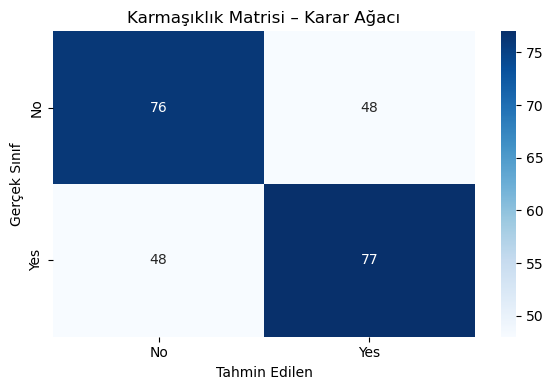

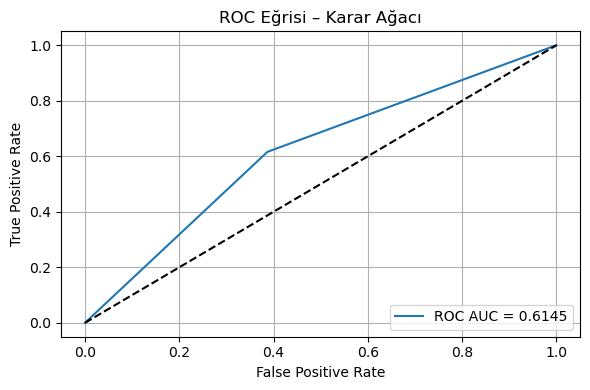

In [5]:
# Sınıflandırma raporu
print("📋 Sınıflandırma Raporu (Decision Tree):\n")
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Karar Ağacı")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – Karar Ağacı")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()